In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smartphones-dataset/Smartphones_cleaned_dataset.csv


# Чтение датасета, проверка типов данных

In [2]:
df = pd.read_csv("/kaggle/input/smartphones-dataset/Smartphones_cleaned_dataset.csv")
import warnings
warnings.filterwarnings("ignore")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [4]:
df

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,...,120,3,1.0,android,64.0,16.0,0,NaN,1080,2460
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,...,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,...,144,3,1.0,android,64.0,16.0,0,NaN,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,...,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2400


**Посмотрим что значит каждая колонка**

1. brand_name - производитель
2. model - название модели
3. price - цена
4. rating - рейтинг устройства
5. has_5g - наличие 5G
6. has_nfc - наличие NFS
7. has_ir_blaster - наличие инфракрасного порта
8. processor_brand - бренд процессора
9. num_cores - количество ядер
10. processor_speed - скорость процессора
11. battery_capacity - емкость аккума
12. fast_charging_available - наличие быстрой зарядки
13. fast_charging - мощность зарядки в ваттах
14. ram_capacity - оперативка
15. internal_memory - встроенная память
16. screen_size - размер экрана (диагональ полагаю)
17. refresh_rate - частота обновления экрана в гц
18. num_rear_cameras - кол-во основных камер
19. num_front_cameras - кол-во фронтальных камер
20. os - операционная система
21. primary_camera_rear - разрешение основной камеры(камер)
22. primary_camera_front - разрешение фронтальной камеры
24. extended_memory_available - возможность увеличить объем памяти
25. extended_upto - доп память
26. resolution_width - разрешение экрана по ширине
27. resolution_height - разрешение экрана по высоте

**Перед тем как проводить аналитику хочется отказаться от очевидно бесполезных полей. В нашем случае это extended_memory_available, extended_upto (причина: в extended_upto много пропусков значений, дополнительная память не будет напрямую влиять на цену, у нас есть более важные поля)**

In [5]:
df = df.drop(['extended_memory_available', 'extended_upto'], axis=1)

# Делаем проверку на неочевидные пропуски 

In [6]:
df.isnull().sum()

brand_name                   0
model                        0
price                        0
rating                     101
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand             20
num_cores                    6
processor_speed             42
battery_capacity            11
fast_charging_available      0
fast_charging              211
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            4
os                          14
primary_camera_rear          0
primary_camera_front         5
resolution_width             0
resolution_height            0
dtype: int64

Что будем делать с пропусками:
Так как датасет не такой большой по значениям (что логично, мы рассматриваем модели телефонов, количество которых не может стремиться к 10000), нам нужно оставить около 10-15 самых важных для рассмотрения полей, чтобы не допустить переобучение

Отсюда я хочу удалить столбцы rating, processor_brand (так как есть более говорящая характеристика - скорость), fast_charging, num_front_cameras (фронтальная камера почти везде одна), os (много пропусков + хочется рассмотреть ценообразование со стороны внутрянки телефона, а не маркетинга) и primary_camera_front (разрешение основной камеры более говорящая характеристика)

In [7]:
df = df.drop(['fast_charging','rating','processor_brand','num_front_cameras','os','primary_camera_front'], axis=1)

In [8]:
df

,brand_name,model,price,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,True,True,False,8.0,3.20,5000.0,1,12,256,6.70,120,3,50.0,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,True,False,False,8.0,2.20,5000.0,1,6,128,6.59,120,3,64.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,True,False,False,8.0,2.40,5000.0,1,4,64,6.60,90,3,50.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,True,False,False,8.0,2.20,5000.0,1,6,128,6.55,120,3,50.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,True,False,False,8.0,2.60,5000.0,1,6,128,6.70,120,3,108.0,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,True,False,False,8.0,3.00,5000.0,1,8,128,6.67,120,3,64.0,1080,2460
976,honor,Honor X8 5G,14990,True,False,False,8.0,2.20,5000.0,1,6,128,6.50,60,3,48.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,True,True,True,8.0,2.85,5080.0,1,8,256,6.60,144,3,64.0,1080,2460
978,motorola,Motorola Moto G91 5G,19990,True,True,False,8.0,2.20,5000.0,1,6,128,6.80,60,3,108.0,1080,2400


У нас осталось 18 полей, первые 3 из которых просто информативные. Приступим к построению графиков, чтобы выяснить какие поля наиболее актуальны для нас. Но сначала добьем пропуски в оставшихся полях, заполним их средними значениями

In [9]:
df.isnull().sum()

brand_name                  0
model                       0
price                       0
has_5g                      0
has_nfc                     0
has_ir_blaster              0
num_cores                   6
processor_speed            42
battery_capacity           11
fast_charging_available     0
ram_capacity                0
internal_memory             0
screen_size                 0
refresh_rate                0
num_rear_cameras            0
primary_camera_rear         0
resolution_width            0
resolution_height           0
dtype: int64

In [10]:
df['num_cores'] = df['num_cores'].fillna(df['num_cores'].mean())
df['processor_speed'] = df['processor_speed'].fillna(df['processor_speed'].mean())
df['battery_capacity'] = df['battery_capacity'].fillna(df['battery_capacity'].mean())

In [11]:
df.isnull().sum()

brand_name                 0
model                      0
price                      0
has_5g                     0
has_nfc                    0
has_ir_blaster             0
num_cores                  0
processor_speed            0
battery_capacity           0
fast_charging_available    0
ram_capacity               0
internal_memory            0
screen_size                0
refresh_rate               0
num_rear_cameras           0
primary_camera_rear        0
resolution_width           0
resolution_height          0
dtype: int64

# Закодируем нечисловые данные

In [12]:
categorical_features = df.select_dtypes(include=['object','bool']).columns.tolist()

In [13]:
categorical_features

['brand_name', 'model', 'has_5g', 'has_nfc', 'has_ir_blaster']

In [13]:
categorical_cols = df.select_dtypes(include=['object','bool']).columns
label_encoders = {}
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
label_encoders

{'brand_name': LabelEncoder(),
 'model': LabelEncoder(),
 'has_5g': LabelEncoder(),
 'has_nfc': LabelEncoder(),
 'has_ir_blaster': LabelEncoder()}

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand_name               980 non-null    int64  
 1   model                    980 non-null    int64  
 2   price                    980 non-null    int64  
 3   has_5g                   980 non-null    int64  
 4   has_nfc                  980 non-null    int64  
 5   has_ir_blaster           980 non-null    int64  
 6   num_cores                980 non-null    float64
 7   processor_speed          980 non-null    float64
 8   battery_capacity         980 non-null    float64
 9   fast_charging_available  980 non-null    int64  
 10  ram_capacity             980 non-null    int64  
 11  internal_memory          980 non-null    int64  
 12  screen_size              980 non-null    float64
 13  refresh_rate             980 non-null    int64  
 14  num_rear_cameras         9

# Прекрасно! Теперь работаем с графиками для более точной аналитики

Импортируем необходимые библиотеки для визуализации

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Посмотрим для начала как сильно разнятся цены в нашем датасете, чтобы учесть возможные выбросы (слишком дорогие девайсы, которые значительно повлияют на прогнозы)

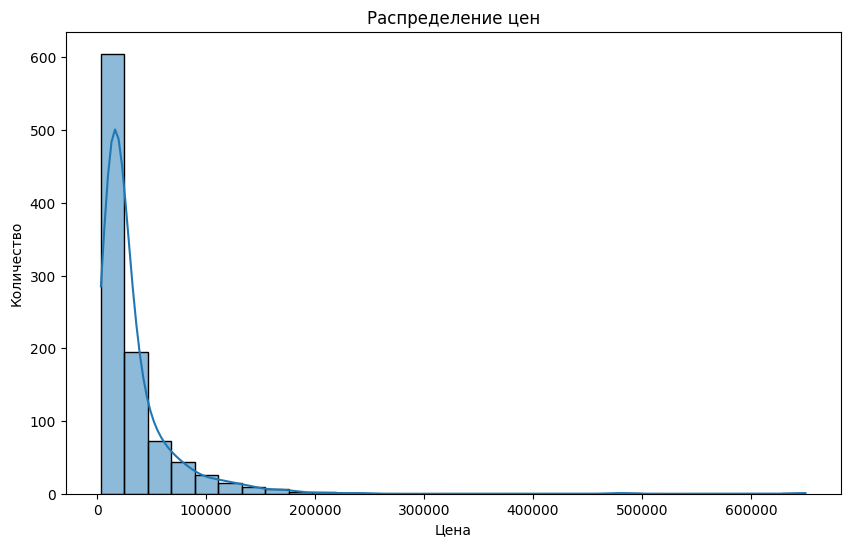

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Распределение цен")
plt.xlabel("Цена")
plt.ylabel("Количество")
plt.show()

Вывод: большинство смартфонов сосредоточены в низком и среднем ценовом сегменте. Выбросы (дорогие модели) требуют логарифмирования цены

Далее сразу сделаем красивый график корреляции цены и всех характеристик, чтобы одним глазом иметь понимание куда идти далее и какие поля брать или объединять

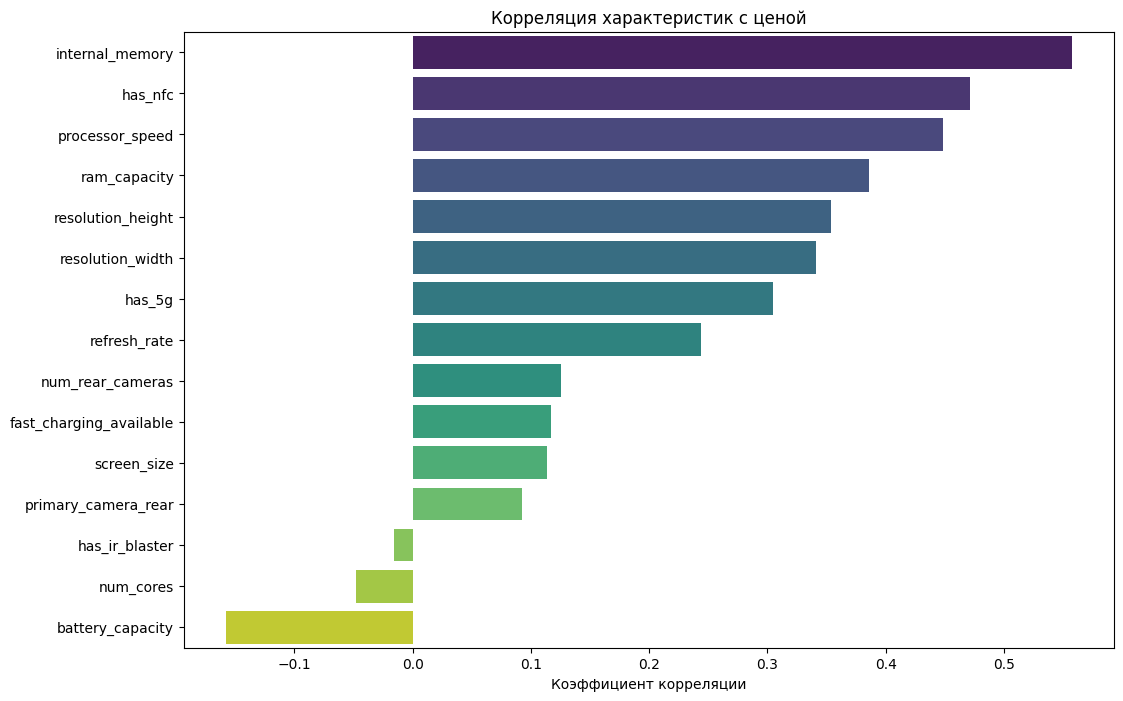

In [18]:
plt.figure(figsize=(12, 8))
numeric_df = df.iloc[:, 2:].select_dtypes(include=['int64', 'float64'])  # Исключаем первые 2 столбца и выбираем только числовые данные
corr = numeric_df.corr()['price'].sort_values(ascending=False)[1:]  # Исключаем price
sns.barplot(x=corr.values, y=corr.index, palette='viridis')
plt.title("Корреляция характеристик с ценой")
plt.xlabel("Коэффициент корреляции")
plt.show()

Вывод: processor_speed, internal_memory, has_nfs, ram_capacity - самые важные характеристики

Далее я пыталась понять какая это зависимость (линейная?) цены от характеристик

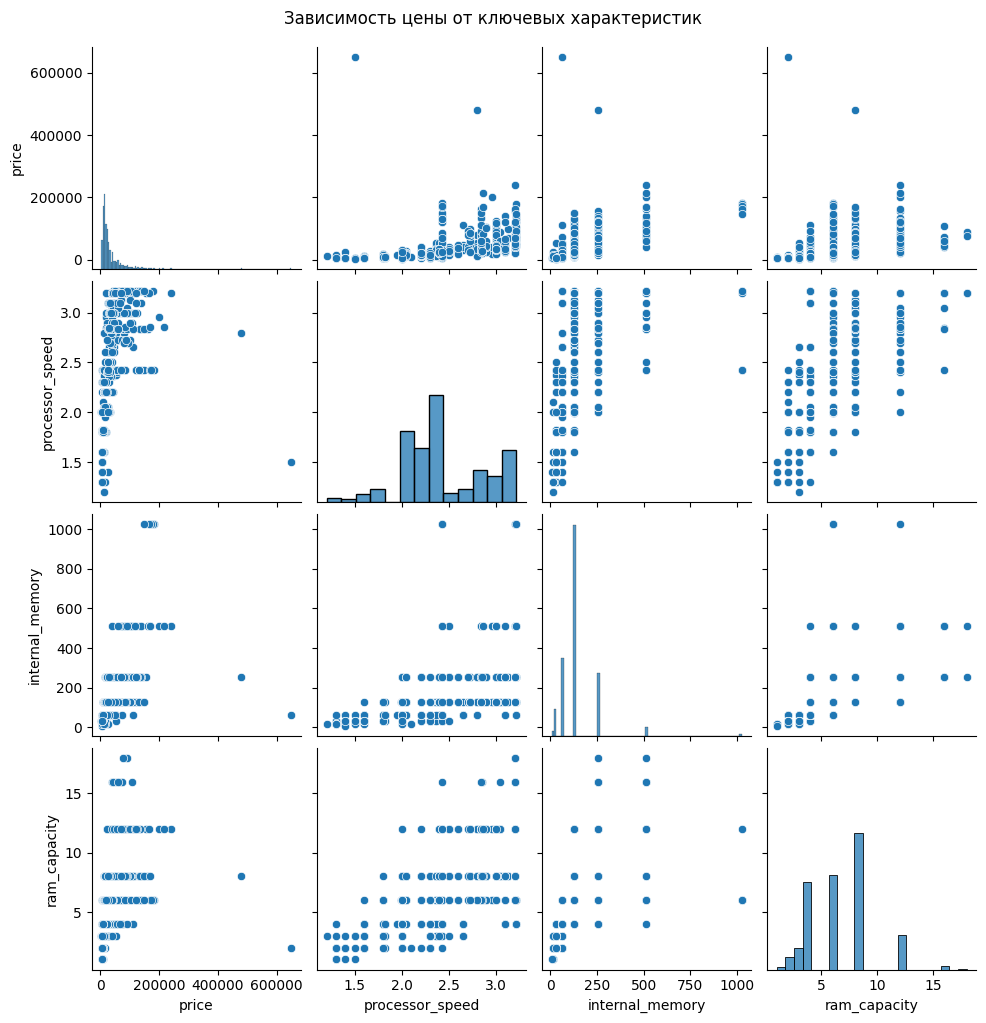

In [19]:
sns.pairplot(df[['price', 'processor_speed', 'internal_memory', 'ram_capacity']])
plt.suptitle("Зависимость цены от ключевых характеристик", y=1.02)
plt.show()

Пока ничего непонятно, но очень интересно. Посмотрим влияние категориальных характеристик на цену

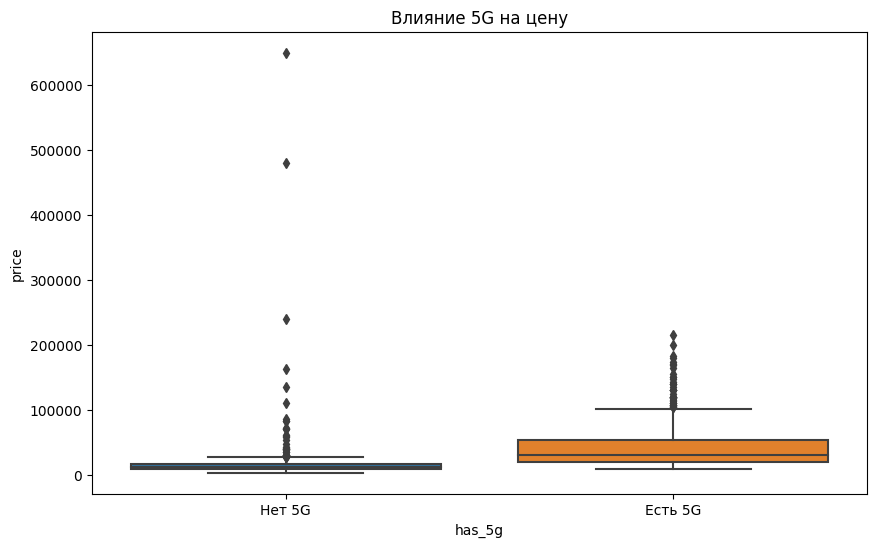

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_5g', y='price', data=df)
plt.title("Влияние 5G на цену")
plt.xticks([0, 1], ["Нет 5G", "Есть 5G"])
plt.show()

Думаю можно сделать вывод, что наличие 5G влияет на цену

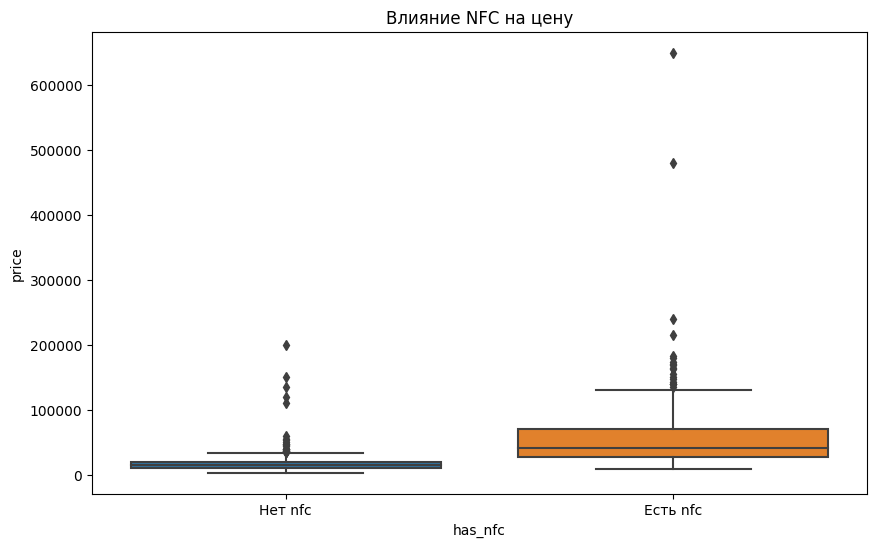

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_nfc', y='price', data=df)
plt.title("Влияние NFC на цену")
plt.xticks([0, 1], ["Нет nfc", "Есть nfc"])
plt.show()

Здесь уже трудно дать такой четкий вывод, оставим пока это поле

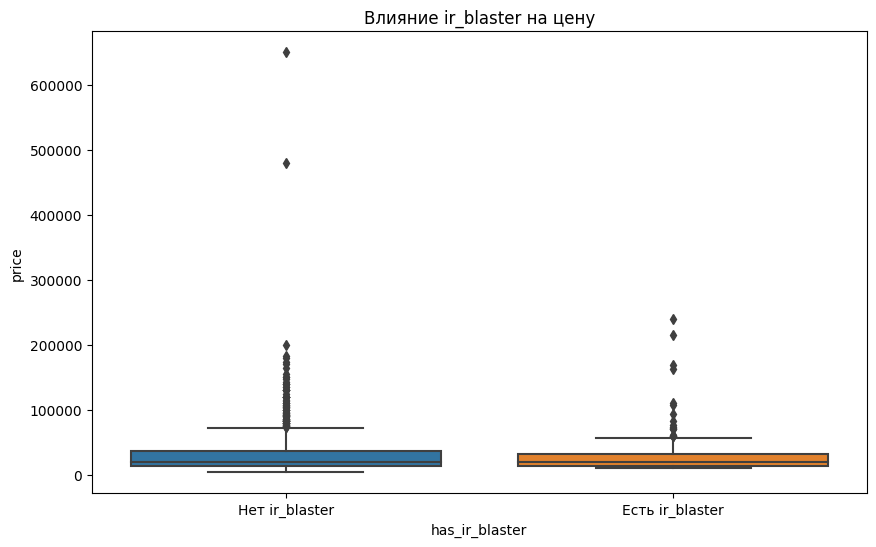

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_ir_blaster', y='price', data=df)
plt.title("Влияние ir_blaster на цену")
plt.xticks([0, 1], ["Нет ir_blaster", "Есть ir_blaster"])
plt.show()

Не будем учитывать поле инфракрасного луча

И наконец перейдем к тепловой карте, анализируем корреляции, избавляемся от ненужных полей, объединяем нужные поля

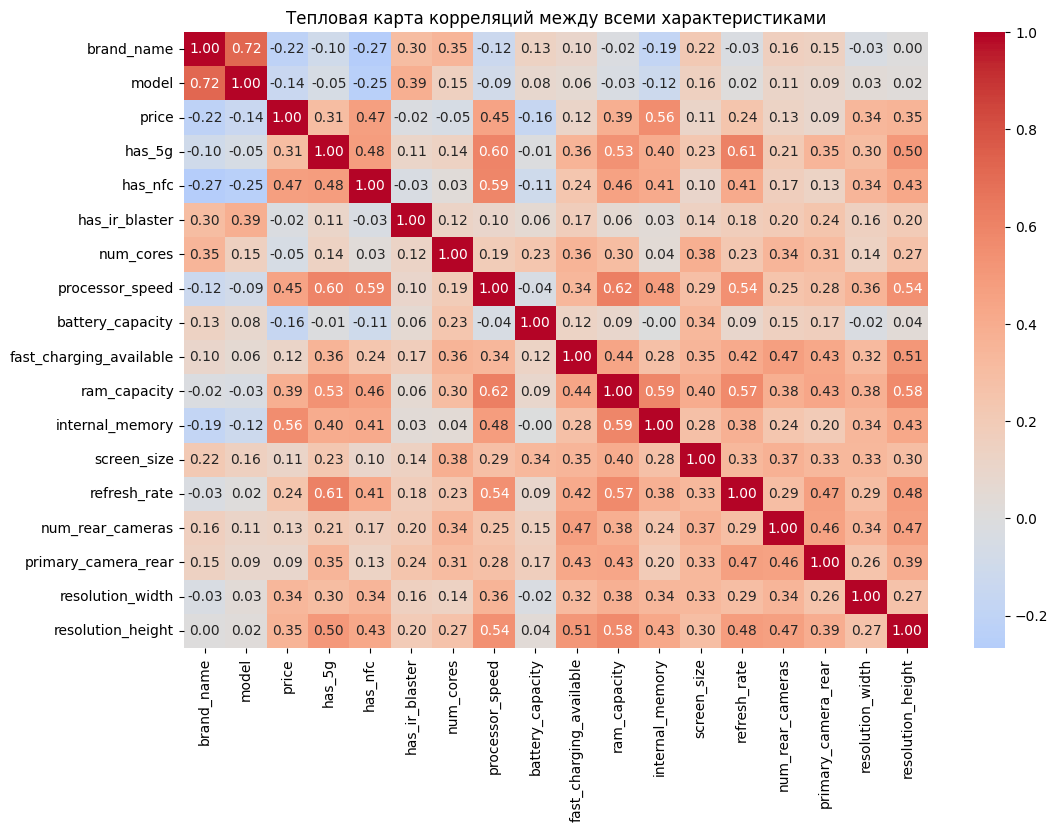

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Тепловая карта корреляций между всеми характеристиками")
plt.show()

Исключим поля has_ir_blaster, battery_capacity, num_cores, screen_size, primary_camera_rear, num_rear_cameras, fast_charging_available из-за низкой корелляции и проведенного выше анализа

In [24]:
columns_to_drop = [
    'has_ir_blaster',
    'battery_capacity',
    'num_cores',
    'screen_size',
    'primary_camera_rear',
    'num_rear_cameras',
    'fast_charging_available',
    'brand_name',
    'model'
]

df.drop(columns=columns_to_drop, inplace=True)

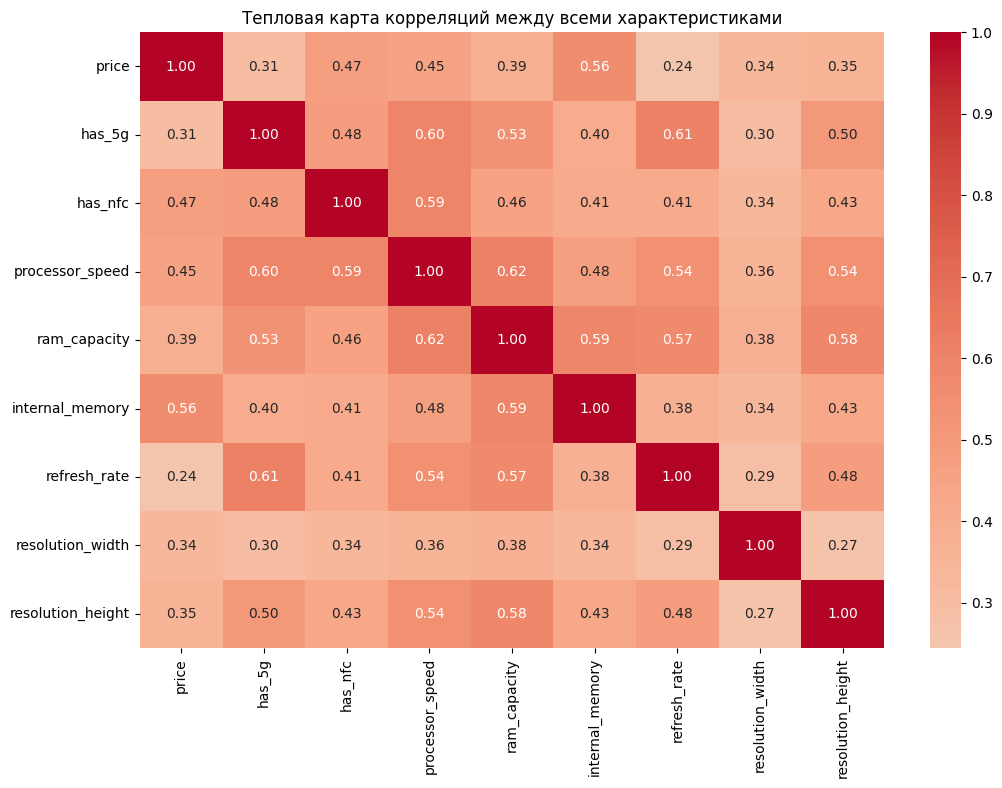

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Тепловая карта корреляций между всеми характеристиками")
plt.show()

Последние шаги и приступаем к следующему этапу:

1) Посчитаем общее колво пикселей
2) Удалим поля, которые кореллируют между собой, чтобы не переобучить модель
3) Логарифмируем поле прайс, чтобы убрать выбросы, которые мы заметили в начале анализа

In [26]:
df['total_pixels'] = df['resolution_width'] * df['resolution_height']
df['log_price'] = np.log(df['price'])
df.drop(columns=['ram_capacity','price','resolution_width', 'resolution_height'], inplace=True)
df['high_end'] = (df['has_5g'] & (df['refresh_rate'] > 90)).astype(int)

In [27]:
df.drop(columns=['has_5g','refresh_rate'], inplace=True)

In [28]:
df

,has_nfc,processor_speed,internal_memory,total_pixels,log_price,high_end
0,1,3.200000,256,4631040,10.915070,1
1,0,2.200000,128,2604960,9.902937,1
2,0,2.400000,64,2600640,9.711055,0
3,0,2.200000,128,2592000,9.615739,1
4,0,2.600000,128,2604960,10.126591,1
...,...,...,...,...,...,...
975,0,3.000000,128,2656800,10.462818,1
976,0,2.200000,128,1152000,9.615139,0
977,1,2.850000,256,2656800,10.274706,1
978,1,2.200000,128,2592000,9.902987,0


# Приступим к обучению!

Подготовка, импортируем инструменты из библиотеки sklearn

In [36]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = df.drop("log_price", axis=1)
y = df["log_price"]

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42) #кросс-валидация

# Линейная модель

In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X_scaled, y, cv=kf, scoring="r2")
print(f"Randomridge R2 scores: {ridge_scores}")
print(f"Ridge R2: {np.mean(ridge_scores):.3f} ± {np.std(ridge_scores):.3f}")

Randomridge R2 scores: [0.79819996 0.79356543 0.72827009 0.77390347 0.70877427]
Ridge R2: 0.761 ± 0.036


# Дерево решений

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=42,max_depth=5)
forest_scores = cross_val_score(rf_model, X_imputed, y, cv=kf, scoring='r2')
print(f"RandomForest R2 scores: {forest_scores}")
print(f"Average R2: {np.mean(forest_scores):.3f} ± {np.std(forest_scores):.3f}")

RandomForest R2 scores: [0.87171068 0.86684309 0.7907011  0.81767031 0.70684152]
Average R2: 0.811 ± 0.060


# Гридиентный бустинг

In [32]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_scores = cross_val_score(xgb, X, y, cv=kf, scoring="r2")
print(f"RandomXGBoost R2 scores: {xgb_scores}")
print(f"XGBoost R2: {np.mean(xgb_scores):.3f} ± {np.std(xgb_scores):.3f}")

RandomXGBoost R2 scores: [0.86353974 0.88091182 0.82905112 0.84244055 0.6997854 ]
XGBoost R2: 0.823 ± 0.064


# Нейронка

In [39]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_scores = cross_val_score(mlp, X_scaled, y, cv=kf, scoring="r2")
print(f"MLP R2 scores: {mlp_scores}")
print(f"MLP R2: {np.mean(mlp_scores):.3f} ± {np.std(mlp_scores):.3f}")

MLP R2 scores: [0.78369413 0.78273658 0.74588263 0.78373493 0.68698488]
MLP R2: 0.757 ± 0.038


# Вывод: Лучшей моделью стал Гридиентный бустинг 

# Поэкспериментируем с предсказаниями

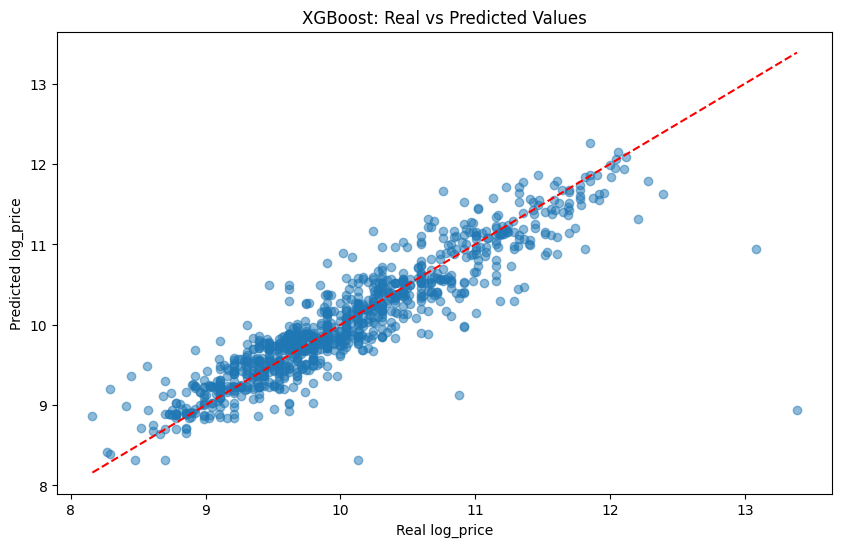

In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer


y_pred = cross_val_predict(xgb, X_imputed, y, cv=kf)


plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Real log_price")
plt.ylabel("Predicted log_price")
plt.title("XGBoost: Real vs Predicted Values")
plt.show()

In [46]:
original_df = pd.read_csv("/kaggle/input/smartphones-dataset/Smartphones_cleaned_dataset.csv")

test = original_df.sample(3, random_state=42)[[
    'has_nfc', 'has_5g', 'refresh_rate', 'processor_speed', 'internal_memory',
    'resolution_width', 'resolution_height', 'price'
]].copy()

test['total_pixels'] = test['resolution_width'] * test['resolution_height']
test['high_end'] = (test['has_5g'] & (test['refresh_rate'] > 90)).astype(int)

X_test = test[['has_nfc', 'processor_speed', 'internal_memory', 'total_pixels', 'high_end']]
y_test_real = test['price']

xgb.fit(X_imputed, y)

y_pred = xgb.predict(X_test)
y_pred_real = np.exp(y_pred)

results = pd.DataFrame({
    'Real Price': y_test_real.values,
    'Predicted Price': y_pred_real,
})

print(results[['Real Price', 'Predicted Price']])

   Real Price  Predicted Price
0      104999    108228.085938
1       15999     19666.783203
2       28999     28470.867188


# Вывод:
* Самыми влияющими характеристиками на цену оказались - наличие nfc, скорость процессора, внутренняя память, разрешение экрана, наличие 5G и частота обновления экрана. Это на самом деле меня не удивляет, все вполне закономерно вышло
* Все обученные модели выдавали достаточно точные результаты, что меня не может не радовать, потому что данных в таблице было не так много. Самым точным оказался "Гридиентный бустинг", что неудивительно, так как он наиболее точно работает с данными из таблиц. Возможно нейронная сеть дала результат хуже из-за того, что в таблице всего 1000 записей